In [ ]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [ ]:
from google.colab import files

In [ ]:
import gdown

In [ ]:
!pip3 install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
! gdown --fuzzy https://drive.google.com/file/d/1Te3oTAqKMeWjfUjZl58RqWuosj-M4Kie/view?usp=share_link

Downloading...
From (uriginal): https://drive.google.com/uc?id=1Te3oTAqKMeWjfUjZl58RqWuosj-M4Kie
From (redirected): https://drive.google.com/uc?id=1Te3oTAqKMeWjfUjZl58RqWuosj-M4Kie&confirm=t&uuid=d4054db0-c1ae-46ae-a63d-28d3e513bd72
To: /content/archive.zip
100% 2.29G/2.29G [00:25<00:00, 90.4MB/s]


In [ ]:
!unzip archive.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: data/leapgestrecog/leapGestRecog/07/06_index/

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('data/leapgestrecog/leapGestRecog/00/'):
  if not j.startswith('.'):
    lookup[j] = count
    reverselookup[count] = j
    count = count + 1
lookup

{'05_thumb': 0,
 '03_fist': 1,
 '09_c': 2,
 '02_l': 3,
 '04_fist_moved': 4,
 '10_down': 5,
 '08_palm_moved': 6,
 '01_palm': 7,
 '07_ok': 8,
 '06_index': 9}

In [ ]:
ds=os.listdir('data/leapgestrecog/leapGestRecog/00/')

In [ ]:
print(ds)

['05_thumb', '03_fist', '09_c', '02_l', '04_fist_moved', '10_down', '08_palm_moved', '01_palm', '07_ok', '06_index']


In [ ]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('data/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('data/leapgestrecog/leapGestRecog/0' +
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('data/leapgestrecog/leapGestRecog/0' +
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

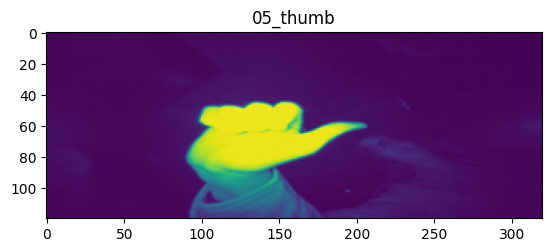

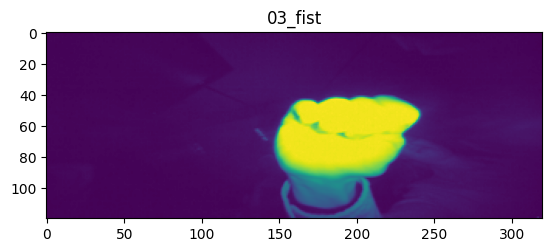

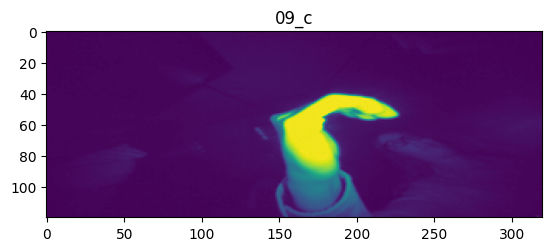

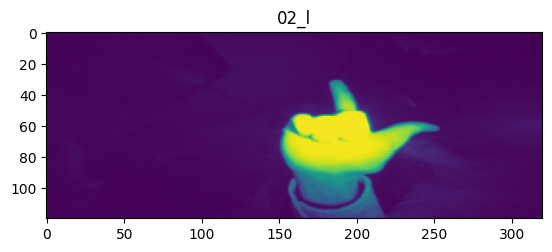

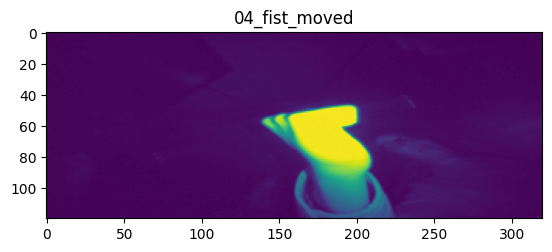

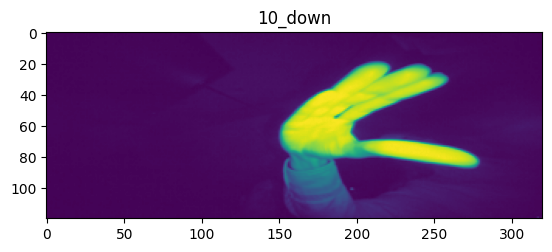

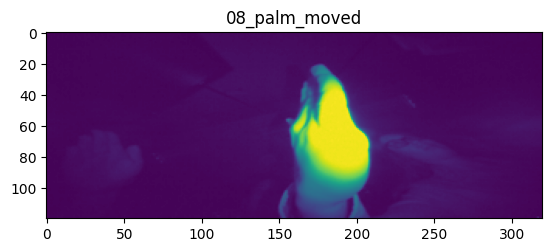

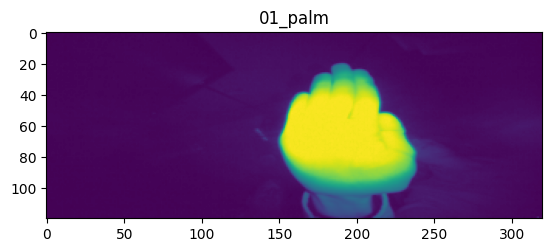

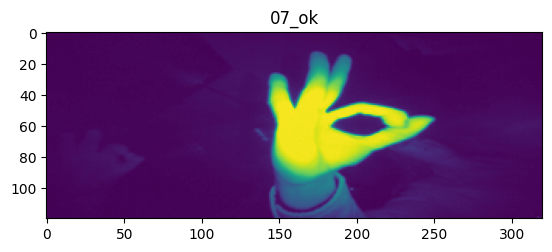

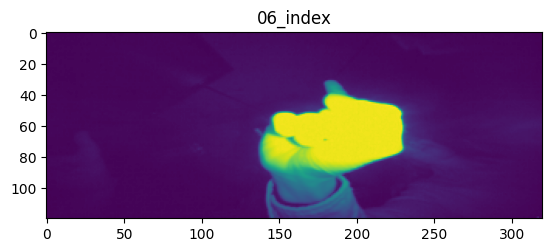

In [ ]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [ ]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [ ]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [ ]:
from keras import layers
from keras import models

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=1, validation_data=(x_validate, y_validate))

500/500 [==============================] - 23s 17ms/step - loss: 0.2153 - accuracy: 0.9319 - val_loss: 0.0105 - val_accuracy: 0.9975


In [ ]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))